In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

### 1. How do the faculty and university you graduated from affect your career?

steps


In [115]:
education_df = pd.read_csv('../data/preprocessed-data/normalized csv/educations.csv')
education_df.head()

,University,Degree,Date,User,university_name,faculty_name
0,information technology institute (iti),nov 2021 - jun 2022,NaN,%D9%90%D9%90amiraelmergawy,iti,NaN
1,ain shams university,"bachelor's degree, computer science",2016 - 2020,%D9%90%D9%90amiraelmergawy,ain shams,computer
2,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,-ezz,iti,NaN
3,al-azhar university,geophysics and seismology,Sep 2015 - Aug 2019,-ezz,azhar,NaN
4,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,1212mohamedtaha,NaN,engineering


In [116]:
len(education_df)

1099

In [117]:
len(education_df[education_df['university_name'].isna()])

168

In [118]:
experience_df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
experience_df = experience_df[(experience_df['title_tag'] != 'internship') & (experience_df['EmploymentType'] != 'Internship')]
experience_df = experience_df[(experience_df['title_tag'] != 'student') & (experience_df['title_tag'] != 'teaching')]
experience_df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,Jan 2022,Present,16.0,"Basel, Switzerland",software
6,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,Sep 2019,Aug 2020,12.0,Egypt,NaN
7,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,May 2022,Present,12.0,"New Cairo, Cairo, Egypt",data
9,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,Jan 2021,Mar 2021,3.0,Remote,NaN
10,3omarbadr,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,Sep 2022,Present,8.0,"Heliopolis, Cairo, Egypt",software


In [119]:
# make sure that every user has one and only one experience with the same company
experience_df = experience_df.drop_duplicates(subset=['User', 'Company'], keep='first')
experience_df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,Jan 2022,Present,16.0,"Basel, Switzerland",software
6,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,Sep 2019,Aug 2020,12.0,Egypt,NaN
7,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,May 2022,Present,12.0,"New Cairo, Cairo, Egypt",data
9,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,Jan 2021,Mar 2021,3.0,Remote,NaN
10,3omarbadr,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,Sep 2022,Present,8.0,"Heliopolis, Cairo, Egypt",software


In [166]:
# Siemens EDA (Siemens Digital Industries Software) 
# Siemens Digital Industries Software
# Information Technology Institute (ITI)
experience_df = experience_df[experience_df['Company'] != 'Information Technology Institute (ITI)']

experience_df['Company'] = experience_df['Company'].replace('Siemens EDA (Siemens Digital Industries Software)', 'Siemens EDA')
experience_df['Company'] = experience_df['Company'].replace('Siemens Digital Industries Software', 'Siemens EDA')

experience_df['Company'].value_counts()[:20]

Upwork                                    49
Valeo                                     46
Vodafone                                  41
Microsoft                                 35
EJADA                                     33
Information Technology Institute (ITI)    31
Freelance                                 27
Breadfast                                 25
Tactful AI                                25
_VOIS                                     24
Dell Technologies                         24
Siemens EDA                               23
Coformatique                              21
Siemens                                   20
Brightskies                               16
Incorta                                   16
ITWorx                                    16
Egyptian Armed Forces                     16
Eventum IT Solutions                      15
Mentor Graphics                           15
Name: Company, dtype: int64

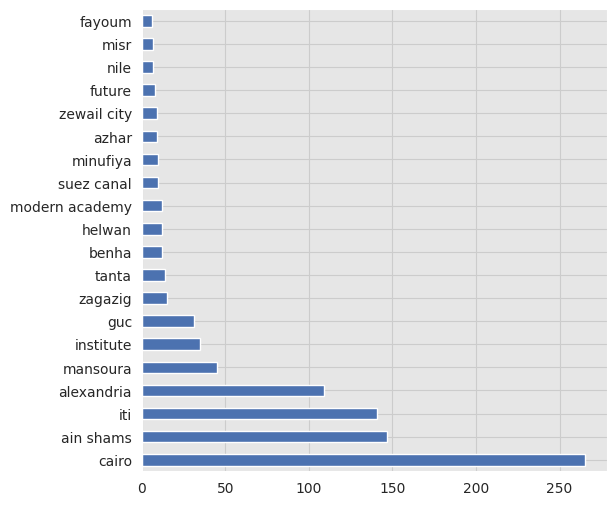

In [159]:
# plot the distribution of number of students per education
education_df['university_name'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(6, 6))
plt.show()

### 1.1 University vs field

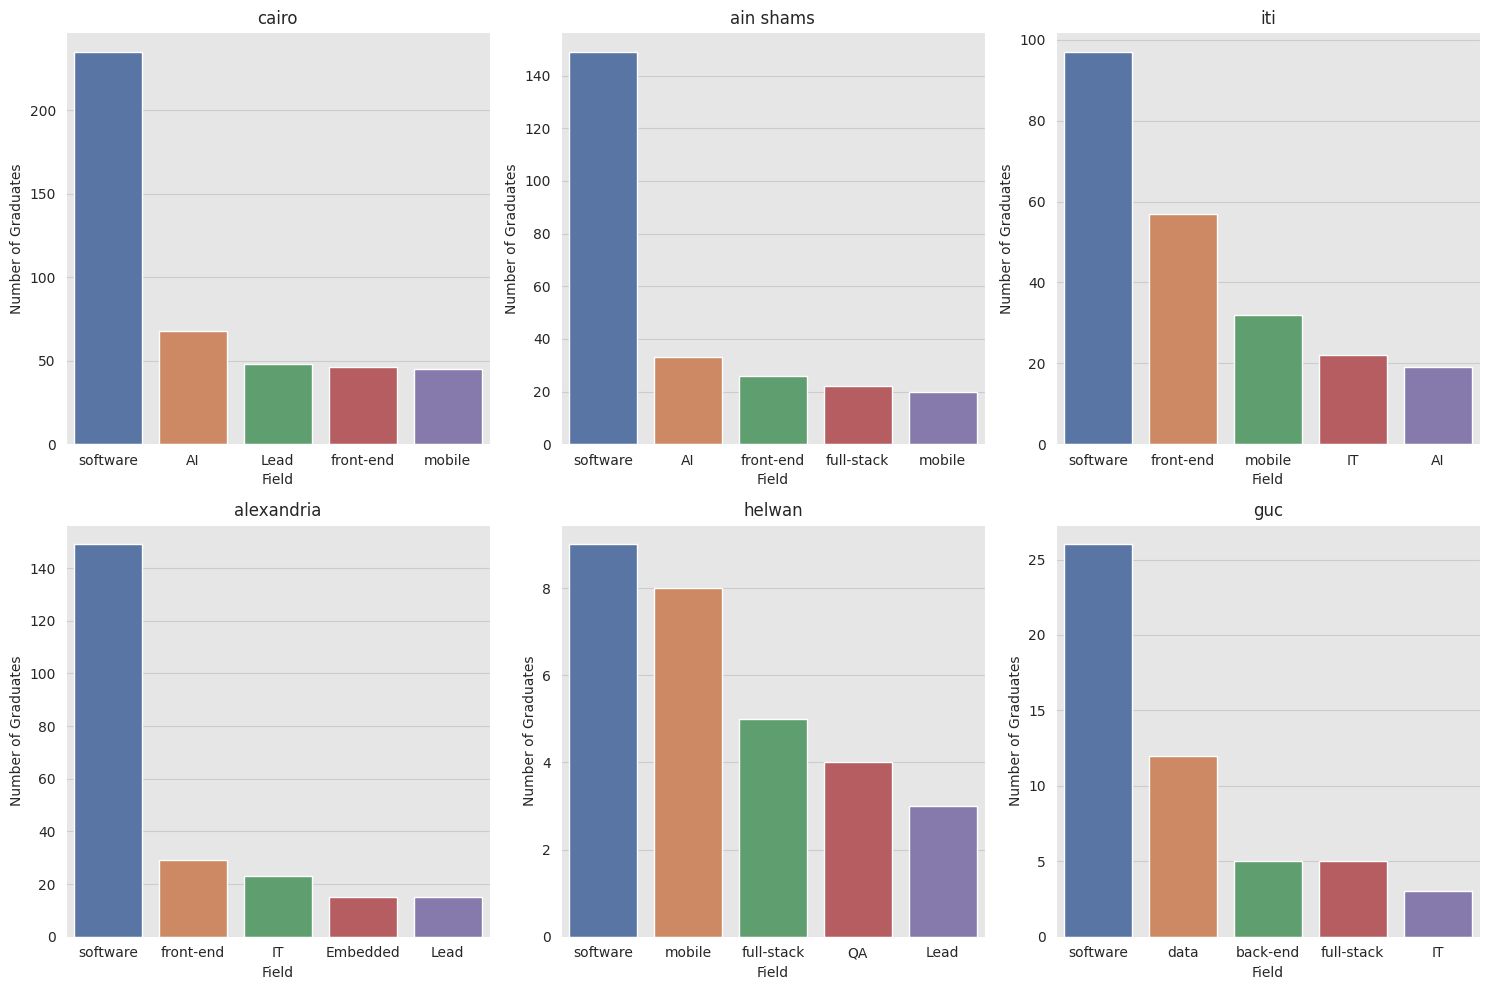

In [160]:
# join education and experience dataframes
merged_df = pd.merge(education_df, experience_df, on='User', how='inner')
df = merged_df.groupby('university_name')['title_tag'].value_counts().sort_values(ascending=False)
df = df.to_frame().rename(columns={'title_tag': 'count'}).reset_index()
universities = ['cairo', 'ain shams', 'iti', 'alexandria', 'helwan', 'guc']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# plot the distribution of number of students per education
for university in universities:
    row = universities.index(university) // 3
    col = universities.index(university) % 3
    d = df[df['university_name'] == university].sort_values(by='count', ascending=False)[:5]
    sns.barplot(x='title_tag', y='count', data=d, ax=axes[row, col])
    axes[row, col].set_title(university)
    axes[row, col].set_xlabel('Field')
    axes[row, col].set_ylabel('Number of Graduates')

fig.tight_layout()
plt.show()
    

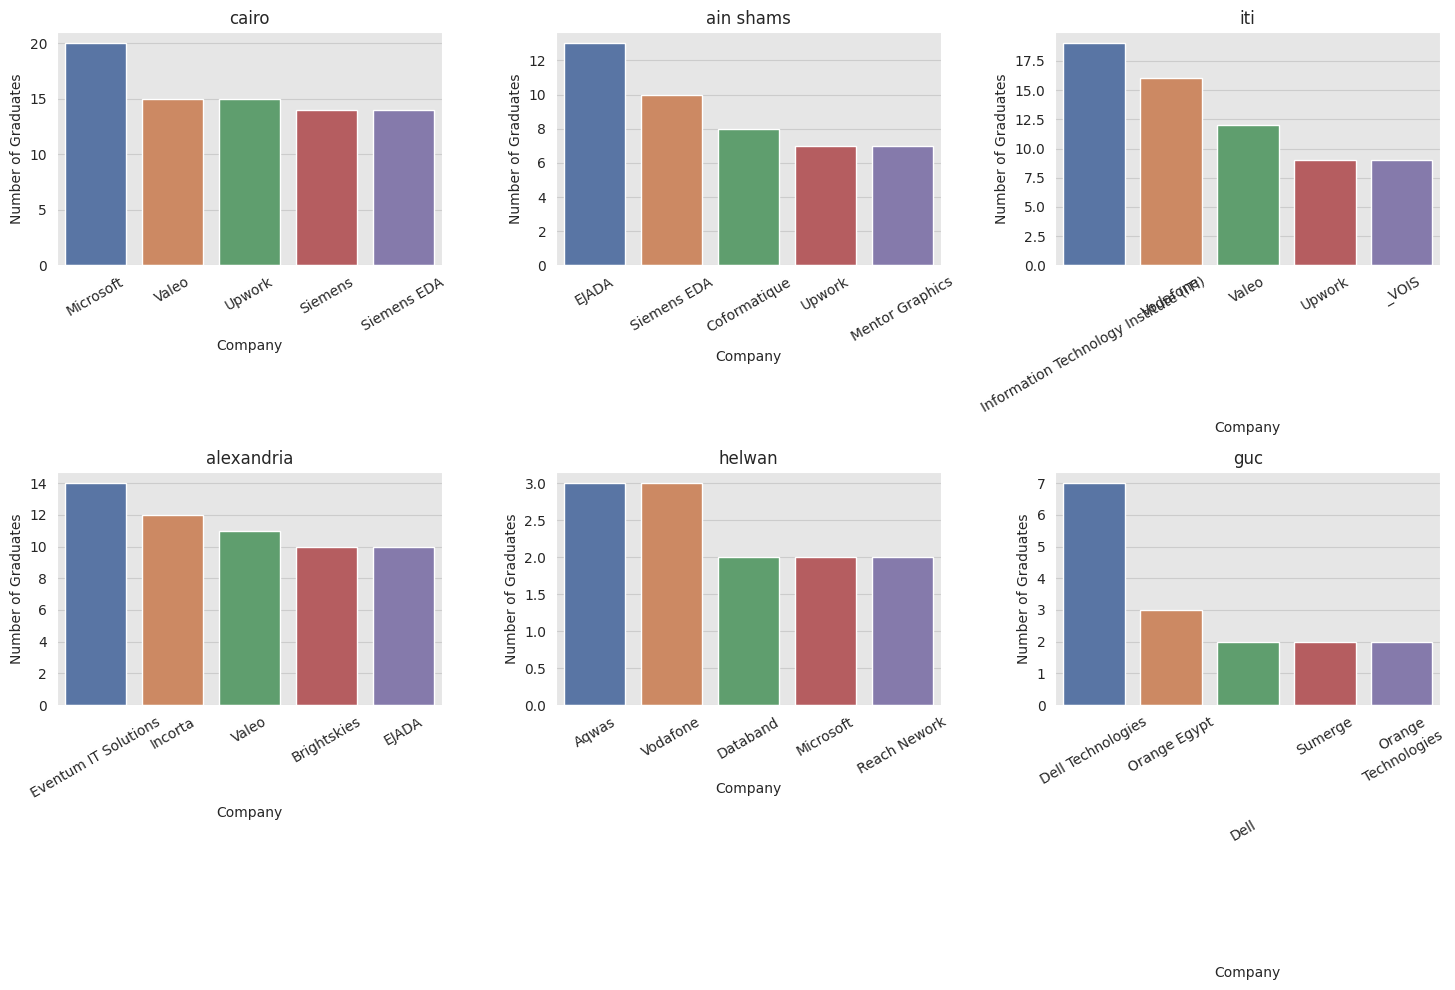

In [163]:
# join education and experience dataframes
merged_df = pd.merge(education_df, experience_df, on='User', how='inner')
df = merged_df.groupby('university_name')['Company'].value_counts().sort_values(ascending=False)
df = df.to_frame().rename(columns={'Company': 'count'}).reset_index()
universities = ['cairo', 'ain shams', 'iti', 'alexandria', 'helwan', 'guc']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# plot the distribution of number of students per education
for university in universities:
    row = universities.index(university) // 3
    col = universities.index(university) % 3
    d = df[df['university_name'] == university].sort_values(by='count', ascending=False)[:5]
    sns.barplot(x='Company', y='count', data=d, ax=axes[row, col])
    axes[row, col].set_title(university)
    axes[row, col].set_xlabel('Company')
    axes[row, col].set_ylabel('Number of Graduates')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=30)

fig.tight_layout()
plt.show()
    

In [83]:
experience_df[experience_df['title_tag'] == 'Lead']

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
15,a-mohsen,https://www.linkedin.com/company/10590015/,ItsaCheckmate,software tech lead,NaN,Aug 2022,Present,9.0,NaN,Lead
56,abanoub-labib-706b1a50,https://www.linkedin.com/company/1862288/,Coformatique,engineering manager,Full-time,Mar 2023,Present,2.0,NaN,Lead
103,abdelkader-zayed-7959b2a3,https://www.linkedin.com/company/18346038/,Tqnee,senior software developer team lead,NaN,Jul 2017,Aug 2018,14.0,Mansoura,Lead
161,abdelrhman-elsaadi-41773070,https://www.linkedin.com/company/2413087/,nWeave,team lead,Full-time,Feb 2023,Present,3.0,"Alexandria, Egypt · On-site",Lead
178,abdofawzi5,https://www.linkedin.com/company/69565615/,Amenli,tech lead,Full-time,Dec 2021,Dec 2022,13.0,Hybrid,Lead
...,...,...,...,...,...,...,...,...,...,...
3210,tarekdawoud,https://www.linkedin.com/company/1035/,Microsoft,principal pm manager,NaN,Sep 2017,Present,68.0,"Redmond, WA",Lead
3214,tarekdawoud,https://www.linkedin.com/company/55199/,ICCC Cairo,lead software development engineer,NaN,Mar 1999,Dec 2000,22.0,NaN,Lead
3215,tarekdawoud,UNKNOWN,ICCC,"software developer, lead software developer",NaN,1998,2000,24.0,NaN,Lead
3250,yasmin-eltahan-323b82168,https://www.linkedin.com/company/1009/,IBM,etl operation lead,Full-time,Sep 2021,Present,20.0,NaN,Lead
